# AAIT – EXP-09: Fake News Detection (Text Classification)

**Goal:** Build a tiny “FAKE vs REAL” text classifier using **TF‑IDF + Naive Bayes** in **Google Colab**.

✅ This is a **learning demo** (small dataset).  
❗ This is **not** a real fact-checking system — it only learns patterns from the sample data.


## IMPORTANT (Must do first)

1. Open this notebook from the link.
2. Go to **File → Save a copy in Drive** (or **File → Save a copy in Drive**).
3. Rename it as: **AAIT_EXP-09_YourRollNo.ipynb**
4. Then start filling the blanks and run the cells in order.


## Step 1 — Import libraries

**Why these libraries?**
- `pandas`: read CSV and handle tables
- `train_test_split`: split into Train/Test
- `TfidfVectorizer`: convert text → numbers
- `MultinomialNB`: simple and fast text classifier
- `accuracy_score`, `confusion_matrix`: evaluate performance
- `matplotlib`: simple plotting


In [ ]:
# STEP 1: Load Required Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import _________   # <-- fill (Vectorizer)
from sklearn.naive_bayes import _________              # <-- fill (Classifier)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt

print("All libraries loaded successfully.")


All libraries loaded successfully.


## Step 2 — Load the dataset

You have **2 options**:
- **Option A (Recommended):** Use the GitHub raw link (fast + easy).
- **Option B:** Upload the CSV file from your laptop (useful if GitHub link fails).

Your dataset must have **2 columns**:
- `text`  → the news/headline
- `label` → `FAKE` or `REAL`


In [ ]:
# STEP 2A: Load from GitHub RAW link
url = "https://raw.githubusercontent.com/swarupjoys/ai-labs/main/AAIT/2025-26/datasets/ap_ts_fake_news_sample_2026.csv"

df = pd.read_csv(url)

# Shuffle the data to avoid same-label blocks
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Dataset loaded. Rows:", df.shape[0])


Dataset loaded. Rows: 140


In [ ]:
# STEP 2B (Optional): Upload CSV from your laptop (if needed)
# Run ONLY if Step 2A fails.

# from google.colab import files
# uploaded = files.upload()   # Choose your CSV
# filename = list(uploaded.keys())[0]
# df = pd.read_csv(filename)

# df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# print("Dataset loaded. Rows:", df.shape[0])


## Step 3 — Preview + basic checks

In [ ]:
# STEP 3: Preview the Data
display(df.head(5))
print("\nColumns:", list(df.columns))
print("Unique labels:", df['label'].unique())


,text,label
0,TS Education Board to introduce “Meme Studies”...,FAKE
1,LIMAT students spotted using AI to do yoga ass...,FAKE
2,District collector announces local holiday for...,REAL
3,TS Inter Board adopts digital evaluation system,REAL
4,Hyderabad colleges to allow reels instead of l...,FAKE



Columns: ['text', 'label']
Unique labels: ['FAKE' 'REAL']


## Step 4 — Student Task: Print basic stats (Fill the blanks)

You should print:
- Total rows
- Label counts

**Hint:** `df.shape[0]` and `df['label'].value_counts()`


In [ ]:
# STEP 4: Print basic stats (read-only)
print("Dataset contains:", df.shape[0], "rows")
print("Label counts:\n", df['label'].value_counts())


Dataset contains: 140 rows
Label counts:
 label
FAKE    70
REAL    70
Name: count, dtype: int64


## Step 5 — Prepare X (text) and y (labels)

We convert labels into numbers:
- `FAKE` → 0
- `REAL` → 1


In [ ]:
# STEP 5: Prepare Input (X) and Output (y)
X = df['text'].astype(str)                 # News headlines/text
y = df['label'].map({'FAKE': 0, 'REAL': 1})

print("Prepared X and y. Example y values:", y.head().tolist())


Prepared X and y. Example y values: [0, 0, 1, 1, 0]


## Step 6 — Train/Test split

We keep **80% for training** and **20% for testing**.  
`stratify=y` keeps FAKE/REAL ratio similar in train and test.


In [ ]:
# STEP 6: Split into Training and Testing Sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=____, random_state=42, stratify=y  # <-- fill test_size (e.g., 0.2)
)

print("Train size:", len(X_train), " | Test size:", len(X_test))


Train size: 112  | Test size: 28


## Step 7 — Convert text to numbers (TF‑IDF)

**TF‑IDF idea (simple):**
- Common words get **less weight**
- Important words get **more weight**


In [ ]:
# STEP 7: Convert Text to Numbers using TF-IDF
# Keep it simple and stable for a small dataset
vectorizer = TfidfVectorizer(
    lowercase=True,
    ngram_range=(1, 2),
    max_features=2000
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Text vectorized.")
print("Train matrix shape:", X_train_vec.shape)


Text vectorized.
Train matrix shape: (112, 1305)


## Step 8 — Student Task: Train the classifier (Fill the blanks)

**Hint:** Use `MultinomialNB()` and train with `(X_train_vec, y_train)`


In [ ]:
# STEP 8: Create and Train the Classifier (full working code)
model = _________()  # <-- fill (MultinomialNB)
model.fit(X_train_vec, y_train)
print("Model training completed.")


Model training completed.


## Step 9 — Predict on test set

In [ ]:
# STEP 9: Make Predictions
y_pred = model.predict(X_test_vec)
print("Predictions generated.")


Predictions generated.


## Step 10 — Evaluate (Accuracy + Confusion Matrix + Report)

- **Accuracy**: overall correctness  
- **Confusion Matrix**: where the model got confused (FAKE vs REAL)


In [ ]:
# STEP 10: Evaluate the Model
acc = _________(y_test, y_pred)   # <-- fill (accuracy_score)

cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["FAKE(0)", "REAL(1)"]))


Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

     FAKE(0)       0.71      0.71      0.71        14
     REAL(1)       0.71      0.71      0.71        14

    accuracy                           0.71        28
   macro avg       0.71      0.71      0.71        28
weighted avg       0.71      0.71      0.71        28



## Step 11 — Show sample predictions (helps you understand mistakes)

We will display a small table: **text → actual → predicted**.


In [ ]:
# STEP 11: Show a few sample predictions (Correct + Wrong examples)

sample_df = pd.DataFrame({
    "text": X_test.values,
    "actual": y_test.values,
    "predicted": y_pred
})

# Map numbers back to labels
label_map = {0: "FAKE", 1: "REAL"}
sample_df["actual_label"] = sample_df["actual"].map(label_map)
sample_df["pred_label"] = sample_df["predicted"].map(label_map)

display(sample_df[["text", "actual_label", "pred_label"]].head(10))


,text,actual_label,pred_label
0,AP education department clarifies no holiday d...,REAL,FAKE
1,AP university offers short course on drone cin...,REAL,REAL
2,Students to get ‘study leaves’ in Goa under ne...,FAKE,FAKE
3,Nani to appear in anti-fake news awareness cam...,REAL,REAL
4,All final year exams in AP to be conducted on ...,FAKE,FAKE
5,Skill development centers to open in every dis...,REAL,REAL
6,LIMAT students spotted using AI to do yoga ass...,FAKE,FAKE
7,Reels under 7 seconds to get boosted in AP col...,FAKE,FAKE
8,Govt issues order: students with 100% attendan...,FAKE,FAKE
9,Reels influencers to get digital training at T...,REAL,REAL


## Step 12 — Confusion matrix plot (clean + labeled)

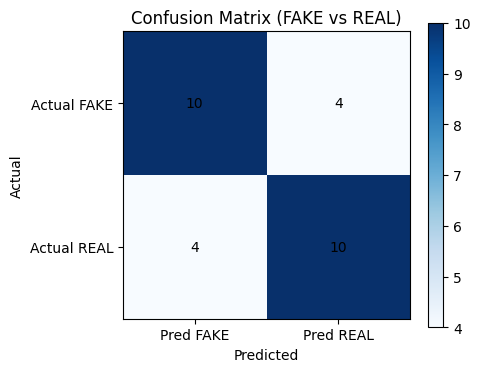

In [ ]:
# STEP 12: Plot the Confusion Matrix (clean + labeled)

plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (FAKE vs REAL)")
plt.xticks([0, 1], ["Pred FAKE", "Pred REAL"])
plt.yticks([0, 1], ["Actual FAKE", "Actual REAL"])

# Add numbers inside boxes
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, int(val), ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.tight_layout()
plt.show()


## Step 13 — Student Task: Test your own headline

Write ONE headline inside the list and run.  
Example: `["Tomorrow is holiday for all colleges in Andhra Pradesh"]`


In [ ]:
# STEP 13: Try Your Own Headline (edit the text inside quotes and run)
your_news = ["Tomorrow is holiday for all colleges in Andhra Pradesh"]

your_vec = vectorizer.transform(your_news)
your_pred = model.predict(your_vec)

print("Your Headline:", your_news[0])
print("Prediction:", "REAL" if your_pred[0] == 1 else "FAKE")


Your Headline: Tomorrow is holiday for all colleges in Andhra Pradesh
Prediction: FAKE
